<a href="https://colab.research.google.com/github/bharathdev329/ICT-DSA/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Case Study: Customer Churn Prediction

**Objective**: You are tasked with developing a machine learning model to predict customer churn
for a telecommunications company. The company wants to identify which customers are likely to
leave (churn) and target them with retention offers. Your goal is to create a machine learning
model that accurately predicts customer churn based on historical customer data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv('/content/Training_data.csv')
train=pd.DataFrame(d)
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


**Step 1:**Exploratory Data Analysis (EDA) and Feature Engineering

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [4]:
train=train.drop(['customerID','gender','TotalCharges'],axis=1)


In [5]:
train.isna().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169
OnlineBackup,0
DeviceProtection,0


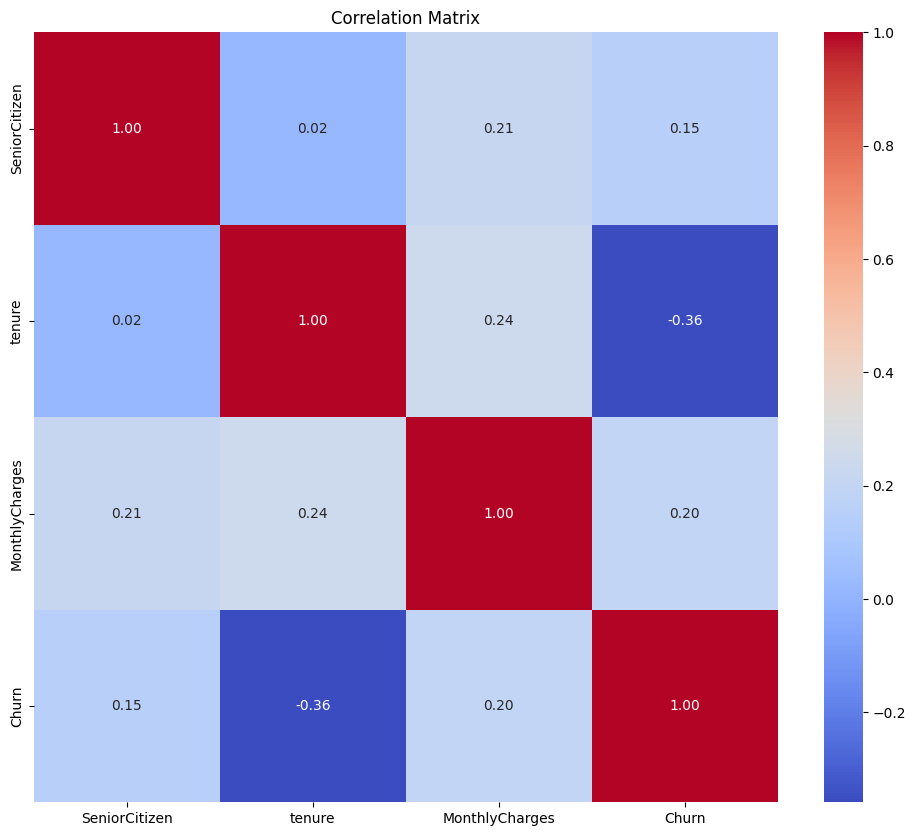

Churn             1.000000
tenure            0.358802
MonthlyCharges    0.195950
SeniorCitizen     0.147568
Name: Churn, dtype: float64


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'train' and the target variable is 'Churn'

# Include 'Churn' in the correlation matrix, even if it's not numerical
# Convert 'Churn' to a numerical type if needed
if train['Churn'].dtype == object:  # Check if 'Churn' is categorical
    train['Churn'] = pd.factorize(train['Churn'])[0]  # Convert to numerical

# Select only numerical features for correlation calculation
numerical_features = train.select_dtypes(include=['number']).columns
train_numerical = train[numerical_features]

# Calculate the correlation matrix, including 'Churn' if it's numerical
corr_matrix = train_numerical.corr()  # Calculate correlation for numerical columns only

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated features with the target variable
# Make sure 'Churn' is in the corr_matrix columns
if 'Churn' in corr_matrix.columns:
    corr_with_target = corr_matrix['Churn'].abs().sort_values(ascending=False)
    print(corr_with_target)
else:
    print("Churn is not included in the correlation matrix, likely due to being non-numeric.")

In [7]:
train=train.drop(['SeniorCitizen'],axis=1)

In [8]:
train.isna().sum()

,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [9]:
train['OnlineSecurity'].fillna('No', inplace=True)
train['MonthlyCharges'].fillna(train['MonthlyCharges'].mean(), inplace=True)


<ipython-input-9-226a10d6346b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['OnlineSecurity'].fillna('No', inplace=True)
<ipython-input-9-226a10d6346b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [10]:
train.isna().sum()

,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [11]:
outlier_col=[]
for column in train.select_dtypes(include=['number']):
    q1 = train[column].quantile(0.25)
    q3 = train[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    count=outliers.shape[0]

    if count>0:
        outlier_col.append(column)
print(outlier_col)

Number of outliers in tenure: 0
Number of outliers in MonthlyCharges: 0
Number of outliers in Churn: 0
[]


In [12]:
train.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,No,No,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,0
1,No,No,28,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,0
2,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,0
3,Yes,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,0
4,Yes,Yes,43,No,No phone service,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,0


**Step2:**Data Preprocessing

In [13]:
#Converting categorical features using Label Encoder

from sklearn.preprocessing import LabelEncoder
categorical_columns = train.select_dtypes(include=['object']).columns
le = LabelEncoder()
for column in categorical_columns:
    train[column] = le.fit_transform(train[column])
train.head()


,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,35,1,0,2,1,1,1,1,1,1,1,0,3,20.75,0
1,0,0,28,0,1,0,0,0,2,2,0,0,0,1,3,35.75,0
2,0,0,56,1,2,1,0,2,0,0,2,2,0,0,2,98.60,0
3,1,0,39,1,0,2,1,1,1,1,1,1,2,1,0,20.45,0
4,1,1,43,0,1,0,0,2,0,2,2,0,1,1,0,51.25,0


In [14]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges']
train[numerical_features] = scaler.fit_transform(train[numerical_features])

train.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,0.097232,1,0,2,1,1,1,1,1,1,1,0,3,-1.530243,0
1,0,0,-0.187173,0,1,0,0,0,2,2,0,0,0,1,3,-1.012710,0
2,0,0,0.950447,1,2,1,0,2,0,0,2,2,0,0,2,1.155753,0
3,1,0,0.259749,1,0,2,1,1,1,1,1,1,2,1,0,-1.540593,0
4,1,1,0.422266,0,1,0,0,2,0,2,2,0,1,1,0,-0.477926,0


Importing the test data and preprocessing it

In [15]:
y=pd.read_csv('/content/Testing_data.csv')
test=pd.DataFrame(y)
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [16]:
test=test.drop(['SeniorCitizen'],axis=1)
test=test.drop(['customerID','gender','TotalCharges'],axis=1)


In [17]:
test.isna().sum()

,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


In [18]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = test.select_dtypes(include=['object']).columns
le = LabelEncoder()
for column in categorical_columns:
    test[column] = le.fit_transform(test[column])
test.head()


,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,1,40,1,2,1,0,0,2,0,0,0,0,1,2,81.20,0
1,1,0,12,1,2,0,2,0,2,0,2,2,1,0,2,78.85,0
2,0,0,43,1,2,1,0,0,0,2,2,2,1,1,2,100.00,1
3,0,0,72,1,2,1,2,2,2,2,2,2,2,1,2,118.20,0
4,0,0,10,0,1,0,0,2,0,2,0,0,0,0,2,36.25,0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges']
test[numerical_features] = scaler.fit_transform(test[numerical_features])

test.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,1,0.352533,1,2,1,0,0,2,0,0,0,0,1,2,0.571552,0
1,1,0,-0.799089,1,2,0,2,0,2,0,2,2,1,0,2,0.493922,0
2,0,0,0.475921,1,2,1,0,0,0,2,2,2,1,1,2,1.192589,1
3,0,0,1.668673,1,2,1,2,2,2,2,2,2,2,1,2,1.793806,0
4,0,0,-0.881348,0,1,0,0,2,0,2,0,0,0,0,2,-0.913321,0


Logistics regression model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import precision_score, recall_score and f1_score

X_train = train.drop('Churn', axis=1)  # Assuming 'Churn' is the target variable
y_train = train['Churn']
X_test = test.drop('Churn', axis=1)
y_test = test['Churn']

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy on testing data: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy on testing data: 0.8112136266855926
Precision: 0.6666666666666666
Recall: 0.5424657534246575
F1-score: 0.5981873111782477


Fine tuning

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train a new model with the best hyperparameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the fine-tuned model
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy after fine-tuning: {accuracy_tuned}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy after fine-tuning: 0.8112136266855926


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8112136266855926
Precision: 0.6666666666666666
Recall: 0.5424657534246575
F1-score: 0.5981873111782477
Confusion Matrix:
[[945  99]
 [167 198]]
ROC AUC Score: 0.7238190836088805
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1044
           1       0.67      0.54      0.60       365

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



Conclusion:

*  Using Logistics Regression model we got an accuracy of 81%
  

